In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
# Rename column
df.rename(columns={'borough': 'area'}, inplace=True)
df.columns

Index(['lsoa_code', 'area', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [8]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [9]:
df.area

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: area, Length: 13490604, dtype: object

In [10]:
df.year

0           2016
1           2016
2           2015
3           2016
4           2008
            ... 
13490599    2015
13490600    2015
13490601    2011
13490602    2011
13490603    2015
Name: year, Length: 13490604, dtype: int64

df.set_index('year', inplace=True)
df.head(3)

In [11]:
condition = df['minor_category'] == 'Robbery'
print(condition)

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Name: minor_category, Length: 13490604, dtype: bool


In [12]:
df.shape

(13490604, 7)

In [13]:
df["minor_category"].value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [14]:
df.loc[df["major_category"] == "Drugs", "area"].value_counts()

Croydon                   51948
Ealing                    50220
Lambeth                   48060
Barnet                    47412
Brent                     46980
Southwark                 45144
Enfield                   44064
Lewisham                  43740
Bromley                   42336
Wandsworth                41904
Newham                    41580
Hackney                   38772
Hillingdon                37584
Tower Hamlets             37368
Greenwich                 37260
Redbridge                 36504
Haringey                  35424
Waltham Forest            34884
Islington                 34128
Camden                    34020
Hounslow                  33912
Bexley                    33264
Havering                  32616
Westminster               32616
Hammersmith and Fulham    31860
Harrow                    31212
Merton                    29160
Sutton                    26784
Kensington and Chelsea    26568
Barking and Dagenham      26244
Richmond upon Thames      23004
Kingston

In [15]:
df[df["year"] < 2010]

,lsoa_code,area,major_category,minor_category,value,year,month
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
17,E01003708,Redbridge,Violence Against the Person,Common Assault,0,2009,6
19,E01004195,Sutton,Drugs,Possession Of Drugs,0,2009,10
33,E01032741,Havering,Violence Against the Person,Harassment,0,2008,1
...,...,...,...,...,...,...,...
13490567,E01004071,Southwark,Theft and Handling,Motor Vehicle Interference & Tampering,0,2008,6
13490573,E01001764,Hackney,Theft and Handling,Handling Stolen Goods,0,2008,9
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490586,E01004341,Waltham Forest,Sexual Offences,Rape,0,2008,9


In [16]:
df_tes = df[
            (df["major_category"] == "Robbery") &
            (df["area"]) &
            (df["year"] > 2010) &
            (df["value"])
]

In [17]:
df_tes

,lsoa_code,area,major_category,minor_category,value,year,month
121,E01000045,Barking and Dagenham,Robbery,Business Property,1,2013,5
135,E01000936,Camden,Robbery,Personal Property,1,2011,11
152,E01002873,Kensington and Chelsea,Robbery,Personal Property,1,2015,7
296,E01000582,Brent,Robbery,Personal Property,1,2011,1
369,E01001272,Ealing,Robbery,Personal Property,1,2011,2
...,...,...,...,...,...,...,...
13490068,E01000633,Brent,Robbery,Personal Property,1,2015,7
13490226,E01004060,Southwark,Robbery,Personal Property,1,2016,2
13490412,E01000950,Camden,Robbery,Personal Property,1,2016,3
13490576,E01004270,Tower Hamlets,Robbery,Personal Property,5,2011,3


In [18]:
df_tes.value_counts('major_category')

major_category
Robbery    80903
dtype: int64

In [19]:
df_tes

,lsoa_code,area,major_category,minor_category,value,year,month
121,E01000045,Barking and Dagenham,Robbery,Business Property,1,2013,5
135,E01000936,Camden,Robbery,Personal Property,1,2011,11
152,E01002873,Kensington and Chelsea,Robbery,Personal Property,1,2015,7
296,E01000582,Brent,Robbery,Personal Property,1,2011,1
369,E01001272,Ealing,Robbery,Personal Property,1,2011,2
...,...,...,...,...,...,...,...
13490068,E01000633,Brent,Robbery,Personal Property,1,2015,7
13490226,E01004060,Southwark,Robbery,Personal Property,1,2016,2
13490412,E01000950,Camden,Robbery,Personal Property,1,2016,3
13490576,E01004270,Tower Hamlets,Robbery,Personal Property,5,2011,3


In [20]:
df_tes.drop(['month'], axis=1, inplace=True)

C:\Users\Ulhaq\AppData\Local\Temp\ipykernel_12156\2224458399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tes.drop(['month'], axis=1, inplace=True)


In [30]:
df_tes.set_index('area', inplace=True)

In [31]:
df_tes.head()

,lsoa_code,major_category,minor_category,value
area,,,,
Barking and Dagenham,E01000045,Robbery,Business Property,1
Camden,E01000936,Robbery,Personal Property,1
Kensington and Chelsea,E01002873,Robbery,Personal Property,1
Brent,E01000582,Robbery,Personal Property,1
Ealing,E01001272,Robbery,Personal Property,1


In [ ]:
df_year = df_tes.groupby('area', axis=0)
df_year.head()

In [25]:
df_top5 = df.sort_values('value', ascending=False)
df_top5.set_index('year', inplace=True)
df_top52 = df_top5.sort_values('value', ascending=False).head(20)
df_top53 = df_top52.sort_values('year', ascending=True)
df_top53

,lsoa_code,area,major_category,minor_category,value,month
year,,,,,,
2008,E01004734,Westminster,Theft and Handling,Other Theft,300,3
2008,E01004734,Westminster,Theft and Handling,Other Theft,288,11
2008,E01004734,Westminster,Theft and Handling,Other Theft,286,12
2008,E01004734,Westminster,Theft and Handling,Other Theft,249,4
2008,E01004734,Westminster,Theft and Handling,Other Theft,251,8
2008,E01004734,Westminster,Theft and Handling,Other Theft,253,10
2008,E01004734,Westminster,Theft and Handling,Other Theft,267,7
2008,E01004734,Westminster,Theft and Handling,Other Theft,254,2
2008,E01004734,Westminster,Theft and Handling,Other Theft,244,1


<AxesSubplot: xlabel='year'>

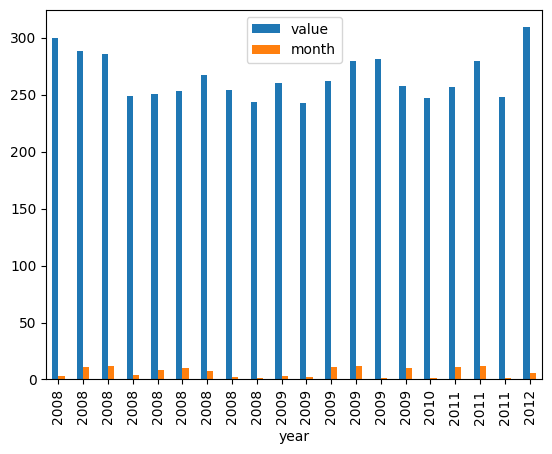

In [26]:
df_top53.plot(kind='bar')

In [27]:
df_coba = df.loc[df['year']  > 2010, ['area', 'major_category', 'value', 'year']]
df_coba2 = df_coba.sort_values('area', ascending=False).head(15)
df_coba2.set_index('year', inplace=True)
df_coba2


,area,major_category,value
year,,,
2012,Westminster,Criminal Damage,0
2016,Westminster,Other Notifiable Offences,2
2013,Westminster,Theft and Handling,4
2011,Westminster,Theft and Handling,0
2013,Westminster,Theft and Handling,1
2013,Westminster,Theft and Handling,20
2016,Westminster,Theft and Handling,0
2011,Westminster,Robbery,0
2012,Westminster,Criminal Damage,0


In [28]:
df_coba2['Total'] = df_coba2['value'].sum(axis=0)
df_coba2

,area,major_category,value,Total
year,,,,
2012,Westminster,Criminal Damage,0,31
2016,Westminster,Other Notifiable Offences,2,31
2013,Westminster,Theft and Handling,4,31
2011,Westminster,Theft and Handling,0,31
2013,Westminster,Theft and Handling,1,31
2013,Westminster,Theft and Handling,20,31
2016,Westminster,Theft and Handling,0,31
2011,Westminster,Robbery,0,31
2012,Westminster,Criminal Damage,0,31


<AxesSubplot: xlabel='year'>

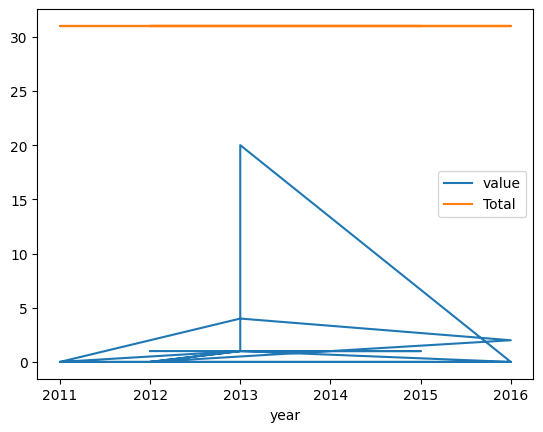

In [29]:
df_coba2.plot(kind='line')

🙌🏻🙌🏻🙌🏻🙌🏻